In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
data = pd.read_csv("Data.csv")
desc = pd.read_csv("Description.csv", header=None)

In [9]:
for i in range(desc.shape[0]):
    print(desc.loc[i,0]+'\n')

X1: Сумма предоставленного кредита (NT доллар): включает как индивидуальный потребительский кредит, так и его/ее семейный (дополнительный) кредит.

X2: Пол (1 = мужской; 2 = женский).

X3: Образование (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другое).

X4: Семейное положение (1 = женат, 2 = холост, 3 = другие).

X5: Возраст (год).

X6 - X11: История прошлых платежей. Были отслежены записи прошлых ежемесячных платежей (с апреля по сентябрь 2005 г.) следующим образом: X6 = статус погашения в сентябре 2005 г.; X7 = статус погашения в августе 2005 г.; . . .;X11 = статус погашения в апреле 2005 г. 

Шкала измерения для статуса погашения: -1 = платить должным образом; 1 = отсрочка платежа на один месяц; 2 = отсрочка платежа на два месяца; . . .; 8 = отсрочка платежа на восемь месяцев; 9 = задержка платежа на девять месяцев и более.

X12-X17: Сумма выписки по счету (NT доллар). X12 = сумма выписки по векселю в сентябре 2005 г.; X13 = сумма выписки по векселю за август 2005 г.;

In [10]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# EDA

- Выбрасываме 1ую строку с тезисным описанием и 1ый столбец с ID

In [11]:
data = data.iloc[1:,1:]

- Есть дизбаланс классов

In [12]:
data.Y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Y, dtype: float64

- NANов нет, все данные как строки, хотя не все они категориальные (X1, X5, Y, X12-X23 - ЧИСЛЕННЫЕ; X2, X3, X4, X6-X11 - КАТЕГОРИАЛЬНЫЕ)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

- Преобразование типа данных численных признаков

In [14]:
d = {'X1':'int', 'X5':'int', 'Y':'int'}
for i in range(12,23+1):
    d[f'X{i}']='int'
data = data.astype(dtype=d)

- Изменение некоторых категориальных призанков, чтобы графики были нагляднее
- Некоторые категориальные признаки имеют больше значений чем было описано, X4 имеет 4 значения, а описано 3; X3 имеет 7 значений, а описано 4. Все неописанные значения уйдут в "Другое"

In [15]:
def modify(x):
    gender = {'1':'М', '2':'Ж'} #X2
    edu = {'1':'Аспирантура','2':'Университет','3':'Ср. школа','4':'Другое','0':'Другое','5':'Другое','6':'Другое'} #X3
    marr = {'1':'Женат','2':'Холост','3':'Другие', '0':'Другие'} #X4
    x['X2'] = gender[x['X2']]
    x['X3'] = edu[x['X3']]
    x['X4'] = marr[x['X4']]
    return x

data = data.apply(func=modify, axis=1)

In [16]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,Ж,Университет,Женат,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Ж,Университет,Холост,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Ж,Университет,Холост,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Ж,Университет,Женат,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,М,Университет,Женат,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- Распределение заемщиков по возрасту

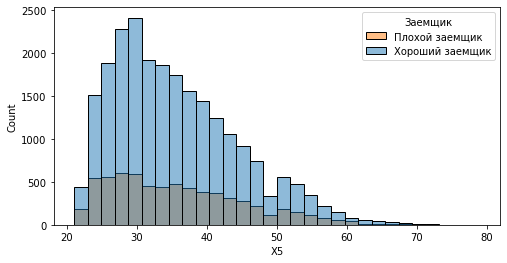

In [17]:
plt.figure(figsize=(8,4))
ax = sns.histplot(x="X5", hue='Y', data=data, bins=30)
plt.legend(title='Заемщик', labels=['Плохой заемщик', 'Хороший заемщик'])
plt.show(ax)

In [18]:
data.X5.mean()

35.4855

- Распределение заемщиков по полу

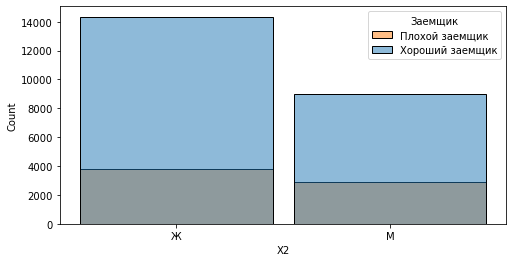

In [19]:
plt.figure(figsize=(8,4))
ax = sns.histplot(x="X2", hue='Y', data=data, shrink=0.9)
plt.legend(title='Заемщик', labels=['Плохой заемщик', 'Хороший заемщик'])
plt.show(ax)

- Распределение заемщиков по образованию

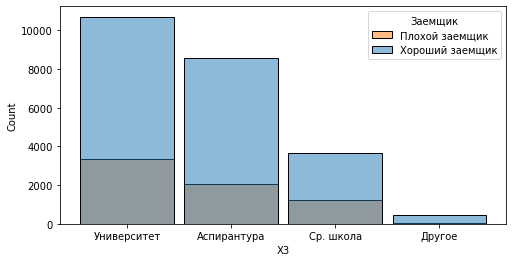

In [20]:
plt.figure(figsize=(8,4))
ax = sns.histplot(x="X3", hue='Y', data=data, shrink=0.9)
plt.legend(title='Заемщик', labels=['Плохой заемщик', 'Хороший заемщик'])
plt.show(ax)

- Распределение заемщиков по семейному положению

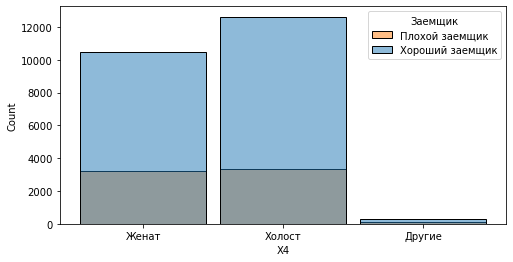

In [21]:
plt.figure(figsize=(8,4))
ax = sns.histplot(x="X4", hue='Y', data=data, shrink=0.9)
plt.legend(title='Заемщик', labels=['Плохой заемщик', 'Хороший заемщик'])
plt.show(ax)

- Распределение возрастов для мужчин и женщин

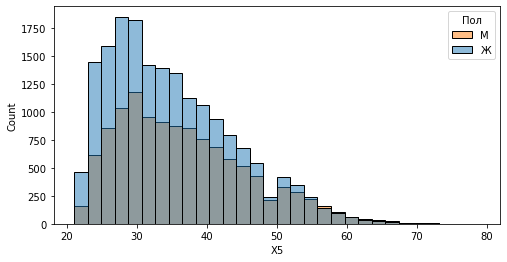

In [22]:
plt.figure(figsize=(8,4))
ax = sns.histplot(x="X5", hue='X2', data=data, bins=30)
plt.legend(title='Пол', labels=['М', 'Ж'])
plt.show(ax)

In [23]:
data[data.X2 == 'Ж']['X5'].describe()[['mean','std']]

mean    34.806868
std      9.029441
Name: X5, dtype: float64

In [24]:
data[data.X2 == 'М']['X5'].describe()[['mean','std']]

mean    36.519431
std      9.404555
Name: X5, dtype: float64

In [25]:
womens = data[data.X2 == 'Ж']['X5']
mans = data[data.X2 == 'М']['X5']

stats.kstest(mans, womens)

KstestResult(statistic=0.0738859359915156, pvalue=1.6135191833037684e-34)

- Посмотрим на критерий согласия Хи-квадрат (в качестве истинно распредления примим распределение распределение возрастов у женщин)

In [26]:
uniq_man_ages = set(np.sort(mans.unique()))
uniq_women_ages = set(np.sort(womens.unique()))
uniq_both_ages = list(uniq_man_ages.intersection(uniq_women_ages))

mans_freq = {}
womens_freq_p={}

for a in uniq_both_ages:
    mans_freq[a] = len(mans[mans==a])
    womens_freq_p[a] = len(womens[womens==a])/len(womens)

mans_freq_list = list(mans_freq.values())
womens_freq_p_list = list(womens_freq_p.values())

#Подсчет статистики t, t_cr с alpha=0.05 и оценка результата
t = 0
n=len(mans_freq_list)
for i in range(n):
    t+= (mans_freq_list[i] - n*womens_freq_p_list[i])**2 / (n*womens_freq_p_list[i])
t_cr = stats.chi2.interval(alpha=0.95, df=n-1)[1]
print(f't={t}, t_cr={t_cr}')
if t>=t_cr:
    print('Гипотеза оттвергается')
else:
    print("Гипотеза не оттвергается")

t=2720137.3735846034, t_cr=75.0018643219286
Гипотеза оттвергается


# Ответы на вопросы

Кого среди заемщиков больше: тех, у кого высока вероятность наступления дефолта в следующем месяце или тех, у кого такая вероятность равна нулю?
<br/>Ответ: Вторых

Каков средний возраст заемщиков?
<br/>Ответ: 35 лет

Среди заемщиков преобладают мужчины или женщины?
<br/>Ответ: Женщины

Верна ли гипотеза о том, что люди с высшим образованием склонны чаще брать кредиты?
<br/>Ответ: Да, верна

Различается ли распределение возрастов для мужчин и женщин в выборке? 
<br/>Ответ: С виду распределения не различаются, однако по критериям Колмогорова-Смирнова и Пирсона гипотеза о равенстве оттвергается... Не совсем согласен с этим, так как распределения ведут себя идентично, особенно подкупает поведение на правом хвосте